<a href="https://colab.research.google.com/github/Statistically-Inclined/Complete-ML/blob/main/ChurnModeling_ANN_Detailed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_churn = pd.read_csv('Churn_Modelling.csv')
df = df_churn.copy()

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# iloc - index location
X = df.iloc[ : , 3:13]  # [ : , 3:13] - All rows & columns from column no. 3 to 12
y = df.iloc[ : , 13]    # [ : , 13]   - All rows & column at column no. 13

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [ ]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [ ]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [ ]:
X.drop(['Geography', 'Gender'], axis=1, inplace=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.concat([X, geography, gender], axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 11) (2000, 11) (8000,) (2000,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
print(X_train_scaled)

[[-0.29715318 -0.75969054  0.68759149 ... -0.57927478 -0.57812007
   0.90202422]
 [-0.17280071  0.38602137 -0.69563147 ...  1.72629647 -0.57812007
   0.90202422]
 [-0.25570235  0.48149736 -1.04143721 ... -0.57927478 -0.57812007
  -1.10861768]
 ...
 [ 1.64067279 -0.56873855  1.03339723 ...  1.72629647 -0.57812007
   0.90202422]
 [ 0.67694116  0.19506939  1.37920297 ... -0.57927478 -0.57812007
   0.90202422]
 [ 0.03445341 -0.28231058 -1.04143721 ... -0.57927478  1.72974448
  -1.10861768]]


In [ ]:
print(X_test_scaled)

[[-1.27124751  2.20006523  0.68759149 ...  1.72629647 -0.57812007
  -1.10861768]
 [-0.45259376  0.76792534 -0.34982573 ...  1.72629647 -0.57812007
   0.90202422]
 [ 0.03445341 -0.66421455 -1.04143721 ... -0.57927478  1.72974448
  -1.10861768]
 ...
 [-1.89300985 -1.61897447 -1.38724295 ... -0.57927478 -0.57812007
  -1.10861768]
 [-0.31787859  0.29054538  1.37920297 ... -0.57927478  1.72974448
   0.90202422]
 [-1.17798316  0.29054538 -1.38724295 ... -0.57927478  1.72974448
   0.90202422]]


###ANN Implementation

In [ ]:
# Tensorflow - Framework
# Keras - Wrapper of Tensorflow

In [ ]:
from keras.models import Sequential                 # Model Initialization
from keras.layers import Dense                      # For Creating Hidden Layers, Input Layers, Output Layers
from keras.layers import Dropout                    # For Handling Overfitting by dropping out few neurons from different layers
from keras.layers import LeakyReLU,ELU,PReLU,ReLU   # Activation Functions for Hidden Layers

In [ ]:
# Initialize the ANN
classifier = Sequential()

In [ ]:
# Input Layer
classifier.add(Dense(units=X_train_scaled.shape[1], activation='relu'))

In [ ]:
# First Hidden Layer
classifier.add(Dense(units=7, activation='relu'))

In [ ]:
# Adding Dropouts for 20%
classifier.add(Dropout(0.2))

In [ ]:
# Second Hidden Layer
classifier.add(Dense(units=6, activation='relu'))

In [ ]:
# Adding Dropouts for 20%
classifier.add(Dropout(0.2))

In [ ]:
# Output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Compiling the ANN (Default)
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
from tensorflow import keras
# Compiling the ANN with new Adam Learning_rate = 0.01
opt = keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics='accuracy')

In [ ]:
model_history = classifier.fit(X_train_scaled, y_train, validation_split=0.33, batch_size=10, epochs=50)

Epoch 1/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4556 - accuracy: 0.8016 - val_loss: 0.3878 - val_accuracy: 0.8243
Epoch 2/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3999 - accuracy: 0.8218 - val_loss: 0.3779 - val_accuracy: 0.8489
Epoch 3/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3962 - accuracy: 0.8278 - val_loss: 0.3627 - val_accuracy: 0.8595
Epoch 4/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3843 - accuracy: 0.8401 - val_loss: 0.3675 - val_accuracy: 0.8542
Epoch 5/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3834 - accuracy: 0.8405 - val_loss: 0.3558 - val_accuracy: 0.8576
Epoch 6/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3792 - accuracy: 0.8403 - val_loss: 0.3703 - val_accuracy: 0.8451
Epoch 7/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3788 - accuracy: 0.8395 - val_loss: 0.3610 - val_accuracy: 0.8546
Epoch 

In [ ]:
print(model_history.history.keys())
print(model_history.history.values())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_values([[0.4555550515651703, 0.39990493655204773, 0.3961825966835022, 0.3842853605747223, 0.38339412212371826, 0.3791991174221039, 0.37877196073532104, 0.3811504542827606, 0.3827100992202759, 0.377735435962677, 0.3752362132072449, 0.3728814423084259, 0.3645847737789154, 0.3650873899459839, 0.3666824400424957, 0.36613723635673523, 0.3635687232017517, 0.3655495047569275, 0.36217832565307617, 0.3629871904850006, 0.3565819263458252, 0.36032235622406006, 0.3626323342323303, 0.3645322620868683, 0.36186960339546204, 0.3605670928955078, 0.36232009530067444, 0.3592177927494049, 0.3591131567955017, 0.36605584621429443, 0.360154926776886, 0.35635554790496826, 0.35577094554901123, 0.3550238609313965, 0.357420951128006, 0.3555496335029602, 0.3561073839664459, 0.35542571544647217, 0.35154664516448975, 0.35860759019851685, 0.3549882173538208, 0.3524669408798218, 0.34893593192100525, 0.3489164113998413, 0.35311952233314514, 0.36076366901

In [ ]:
print(model_history.history['accuracy'])
print(model_history.history['val_accuracy'])

[0.801642119884491, 0.8217951059341431, 0.8277663588523865, 0.8400821089744568, 0.8404552936553955, 0.8402687311172485, 0.8395223021507263, 0.8412017226219177, 0.8361634612083435, 0.8374696969985962, 0.8440007567405701, 0.8447471261024475, 0.8499720096588135, 0.8518380522727966, 0.8492255806922913, 0.8479194045066833, 0.8501586318016052, 0.8501586318016052, 0.8490390181541443, 0.8464265465736389, 0.8516514301300049, 0.8479194045066833, 0.8432543277740479, 0.8514648079872131, 0.8499720096588135, 0.8499720096588135, 0.8533308506011963, 0.849412202835083, 0.850531816482544, 0.8484792113304138, 0.8540772795677185, 0.8529576659202576, 0.8544504642486572, 0.8514648079872131, 0.8551968932151794, 0.8529576659202576, 0.8527710437774658, 0.853704035282135, 0.8510916233062744, 0.8479194045066833, 0.8477327823638916, 0.8507184386253357, 0.8518380522727966, 0.8583691120147705, 0.8550102710723877, 0.8518380522727966, 0.8542638421058655, 0.850531816482544, 0.850531816482544, 0.8497853875160217]
[0.82

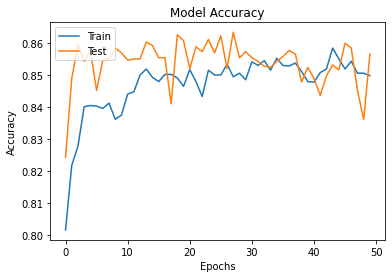

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'], loc='upper left')

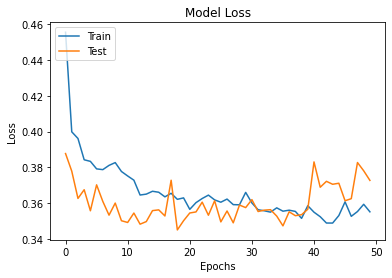

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'], loc='upper left')

### Implementing Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping
callbacks = EarlyStopping(monitor='val_loss', min_delta=0.0001, mode='auto', verbose=1, patience=20, baseline=None, restore_best_weights=False)

In [ ]:
model_history = classifier.fit(X_train_scaled, y_train, validation_split=0.33, batch_size=10, epochs=100, callbacks=callbacks)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3601 - accuracy: 0.8533 - val_loss: 0.3802 - val_accuracy: 0.8542
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3486 - accuracy: 0.8550 - val_loss: 0.3752 - val_accuracy: 0.8550
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3539 - accuracy: 0.8515 - val_loss: 0.3799 - val_accuracy: 0.8425
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3466 - accuracy: 0.8517 - val_loss: 0.3758 - val_accuracy: 0.8557
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8520 - val_loss: 0.3667 - val_accuracy: 0.8599
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3487 - accuracy: 0.8526 - val_loss: 0.3740 - val_accuracy: 0.8622
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3525 - accuracy: 0.8515 - val_loss: 0.3863 - val_accuracy: 0.8550

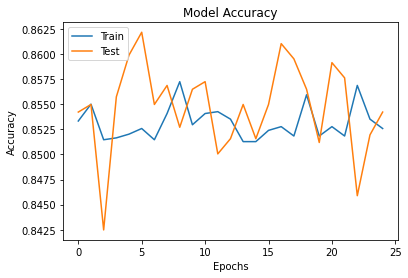

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'], loc='upper left')

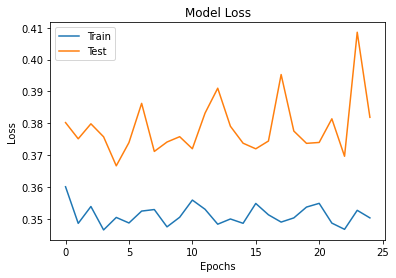

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'], loc='upper left')

In [ ]:
y_test_pred = classifier.predict(X_test_scaled)
y_test_pred

array([[0.83278775],
       [0.41870922],
       [0.19152927],
       ...,
       [0.1523656 ],
       [0.15994045],
       [0.13936183]], dtype=float32)

In [ ]:
# y_test_pred = (y_test_pred >= 0.5)
# y_test_pred

In [ ]:
y_test_pred = np.where(y_test_pred >= 0.7, 1, 0)
y_test_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y_test_pred.shape

(2000, 1)

In [ ]:
# Converting 2D array to 1D array
y_test_pred = np.reshape(y_test_pred, y_test_pred.shape[0])
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test.values

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

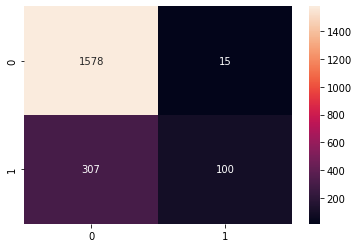

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='g')

In [ ]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1593
           1       0.87      0.25      0.38       407

    accuracy                           0.84      2000
   macro avg       0.85      0.62      0.65      2000
weighted avg       0.84      0.84      0.80      2000



In [ ]:
acc = accuracy_score(y_test, y_test_pred)
print(acc)

0.839


In [ ]:
# Classifier weights values
print(classifier.get_weights())

[array([[-1.43479991e+00,  4.79655653e-01,  6.93265438e-01,
        -6.11476660e-01, -3.53307158e-01,  5.86153567e-01,
         8.67824256e-01, -4.21831906e-01,  5.23857951e-01,
         1.64779857e-01, -1.38385201e+00],
       [ 2.22129479e-01, -3.88446236e+00,  2.15851736e+00,
         2.73642015e+00, -2.01028180e+00,  2.18802834e+00,
        -1.42165291e+00,  1.77855015e+00, -1.10917175e+00,
         6.57496274e-01, -2.30134916e+00],
       [ 4.48440790e-01,  3.53860468e-01, -1.19455181e-01,
        -4.26636100e-01,  7.17348456e-02,  5.25771439e-01,
         1.25112903e+00, -6.78468049e-01, -6.54633164e-01,
        -6.53296769e-01, -5.11227429e-01],
       [ 6.40659571e-01,  1.54990494e+00,  1.82883769e-01,
         7.56331921e-01, -3.93942904e+00, -9.30068314e-01,
        -1.01912355e+00, -1.04622555e+00,  8.03110540e-01,
         1.32397449e+00,  2.11458921e+00],
       [ 3.30735421e+00, -4.03143942e-01, -4.10110593e-01,
         2.95292586e-01,  1.08430910e+00, -8.55989289e-03,
 

In [ ]:
classifier.save('Churn_Model.h5')